In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCVfrom
from sklearn.tree import DecisionTreeClassifier



df = pd.read_csv('insurance.csv')
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1333.000000,1338.000000,1338.000000
mean,39.207025,30.658545,1.094918,13270.422265
std,14.049960,6.092785,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.315000,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.675000,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


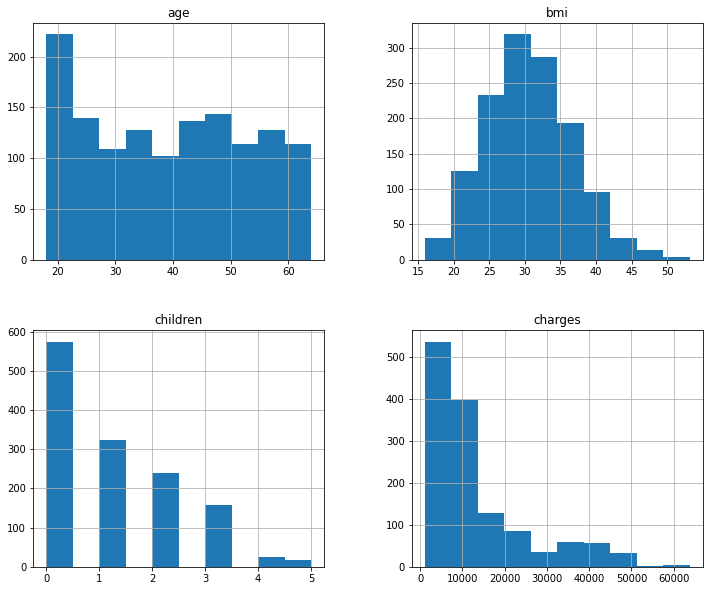

In [6]:
df.hist(figsize=(12,10));


In [7]:
#media bmi
#df['bmi'].sum()/df['bmi'].count()

30.658544636159036

Text(0, 0.5, 'BMI')

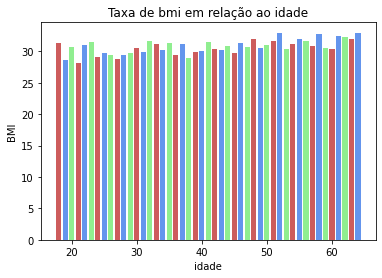

In [17]:
df_plot = df.groupby ('age'). bmi.mean (). reset_index () 
df_plot

myred='#CD5C5C'
myblue='#6495ED'
mygreen='#90EE90'
cols= [myred, myblue,mygreen]

x = df_plot['age']
y = df_plot['bmi']
plt.bar(x,y,color=cols);
plt.title('Taxa de bmi em relação ao idade');
plt.xlabel('idade');
plt.ylabel('BMI')

In [19]:
df['smoker'] = df['smoker'].replace(['no','yes'],[0,1])
df.head(30)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520
5,31,female,25.740,0,0,southeast,3756.62160
6,46,female,33.440,1,0,southeast,8240.58960
7,37,female,27.740,3,0,northwest,7281.50560
8,37,male,29.830,2,0,northeast,6406.41070
9,60,female,25.840,0,0,northwest,28923.13692


In [20]:
df.isnull().sum()


age         0
sex         0
bmi         5
children    0
smoker      0
region      0
charges     0
dtype: int64

In [21]:
modelo = DecisionTreeClassifier() # Nunca faça isso!
modelo.fit(x_treino,y_treino)

dt = DecisionTreeClassifier(random_state=61658)

params = {
    'criterion' : ['gini','entropy'],
    'max_depth' : [2,3,4,5,6,7,8,9],
}

grid = GridSearchCV(
    dt,
    params,
    cv=10,
    scoring='roc_auc', 
    verbose=10,
    n_jobs=1,
)

grid.fit(x_treino,y_treino)

NameError: name 'DecisionTreeClassifier' is not defined